# Visualizing CNN Filters of a VGG19 model: Beginner's Notebook


Welcome to this beginner-friendly notebook focused on visualizing filters in a Convolutional Neural Network (CNN). The main objective of this notebook is to provide a simple and easy-to-understand code that allows you to visualize the filters learned by a CNN.

## Notebook Overview

In this notebook, we will explore the process of visualizing CNN filters using TensorFlow. We will cover the following steps:

1. Loading a Pre-trained CNN Model: We will load a pre-trained CNN model to leverage its learned filters.
2. Extracting Filter Visualizations: We will extract and visualize the learned filters from different layers of the CNN.

Now, let's dive into the exciting world of CNN filters and start visualizing them!


## Setting up inputs and helper functions

In [20]:
# Imports
import time
import random
import numpy as np

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model


<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(0.9999994, shape=(), dtype=float32)
tf.Tensor(2.9444695e-05, shape=(), dtype=float32)


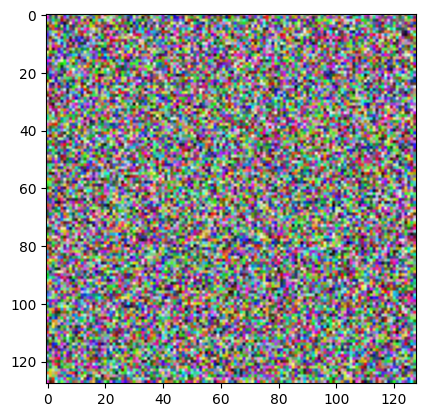

In [21]:
# create a random noise input image

input_shape = (128, 128, 3)

random_image = tf.random.uniform( shape = input_shape,
                                  minval = 0,
                                  maxval = 1,
                                  dtype = tf.dtypes.float32)
                                  #,seed = 10)

plt.imshow(random_image)
print(type(random_image))
print(tf.math.reduce_max(random_image))
print(tf.math.reduce_min(random_image))

In [22]:
def normalize_tensor(tensor):
    # Find the minimum and maximum values in the tensor
    min_val = tf.reduce_min(tensor)
    max_val = tf.reduce_max(tensor)
    
    # Normalize the tensor using the minimum and maximum values
    normalized_tensor = tf.math.divide(tf.subtract(tensor, min_val), tf.subtract(max_val, min_val))
    
    return normalized_tensor


## Loading a pre-trained VGG19 model

In [23]:
# Load the pre-trained VGG19 model
from tensorflow.keras.applications import VGG19

vgg19_model = VGG19(
    include_top=False,
    weights="imagenet",
    input_shape = input_shape 
    )



In [24]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [25]:
# create a submodel from the vgg19


# Specify the name of the layer you want to extract features from
layer_name = 'block3_conv1'

# Create a submodel from the VGG19 model by specifying the input and output layers
vgg19_submodel = Model(
    inputs=vgg19_model.input,  # Set the input of the submodel as the input of the VGG19 model
    outputs=vgg19_model.get_layer(layer_name).output  # Set the output of the submodel as the specified layer's output
    )

# Print the summary of the VGG19 submodel
vgg19_submodel.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

## Training loop and filter visualization

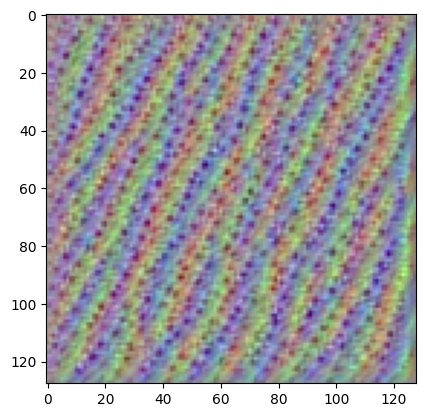

In [26]:
# training loop

filter_index = 0

# Uncomment the following line if you want to start with a zero-filled random image
# random_image = np.zeros(input_shape)

# Uncomment the following line if you want to convert the random_image to a TensorFlow tensor
# random_image = tf.convert_to_tensor(random_image)

for i in range(30):
    with tf.GradientTape() as tape:
        tape.watch(random_image)
        
        # Expand dimensions of random_image to match the expected shape of vgg19_submodel input
        # by adding a batch dimension
        out = vgg19_submodel(tf.expand_dims(random_image, axis=0))[:, :, :, filter_index]
        
        # Compute the mean of the output tensor (loss)
        loss = tf.math.reduce_mean(out)

    # Compute the gradients of the loss with respect to the random_image
    grads = tape.gradient(loss, random_image)
    
    # Normalize the gradients
    grads = tf.math.l2_normalize(grads)
    
    # Update the random_image by adding the normalized gradients scaled by a factor of 15
    random_image += grads * 15
    
    # Uncomment to print the current loss
    #print(loss)

# Normalize the resulting image (have float values in [0..1])
random_image = normalize_tensor(random_image)

# Display the final random_image
plt.imshow(random_image)
